<a href="https://colab.research.google.com/github/JohnEaganFS/CSCI191T/blob/main/Linear%26LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSCI 191T - Machine Learning
##Name: John Eagan 
##Assignment: Linear & Logistic Regression with Iris dataset

Github Link:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import random
!pip uninstall scikit-learn -y # I'm including these two lines so that sklearn is updated to the latest version
!pip install -U scikit-learn   # This is necessary for one of the metrics used in the "Sklearn Metrics" section
import sklearn                 # If you get an error saying you must restart the runtime, do so and then "Run all" one more time for complete notebook results.

Found existing installation: scikit-learn 1.0
Uninstalling scikit-learn-1.0:
  Successfully uninstalled scikit-learn-1.0
  Using cached scikit_learn-1.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.1 MB)


## F(w, x), Sigmoid, and Classify Functions

In [2]:
def F(W,X):
  return sum([w*x for w,x in zip(W,X)])

In [3]:
def sigmoid(x):
  return 1.0/(1+math.exp(-x))

In [4]:
def classify(model, X): # Uses model to classify list of x values [(x0, x1, x2),...] into either 1 (positive) or 0 (negative).
  return [1 if sigmoid(F(model, x)) > 0.5 else 0 for x in X]

# Iris Dataset

In [5]:
import pandas as pd # I will be using pandas for the csv file reading.

## Reading Data from CSV file

I placed the dataset in a Github repository and I am using pandas to read the csv file from the github url into a dataframe. I had to define the names of the features and label as they were not included in the file.

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/JohnEaganFS/CSCI191T/main/datasets/iris.data.csv', names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"])
print(data) # Confirming the data has been read properly.

     Sepal Length  Sepal Width  Petal Length  Petal Width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [7]:
data = data.values.tolist() # Converting the dataframe into a normal list
print(data)

[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'], [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'], [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'], [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'], [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'], [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'], [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'], [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'], [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'], [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'], [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'], [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'], [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'], [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'], [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'], [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'], 

## Visualizing the Data

In [8]:
dataVisual = [((1,x1,x2,x3,x4), species) for (x1,x2,x3,x4,species) in data]

In [9]:
def plotAllClasses(data):
  X = [x for (x,r) in data]
  R = [r for (x,r) in data]

  random.seed(38)

  ax = plt.axes(projection = '3d')
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  ax.set_zlabel("Petal Length")
  classes = list(set(R)) # remove duplicates to just get classes
  for i in classes:
    Xr = [x for (x,r) in data if r == i]
    x1r = [x[1] for x in Xr]
    x2r = [x[2] for x in Xr]
    x3r = [x[3] for x in Xr]
    x4r = [x[4] for x in Xr]
    rgb = [random.random(),random.random(),random.random()]
    ax.scatter3D(x1r, x2r, x3r, color=rgb, s=[50*x for x in x4r])
    ax.legend(classes)

  plt.show()

In this plot, the sepal length, sepal width, and petal length are presented using the axes. The petal width is represented by the size of the marker for each data point. Each species of iris is a different color.

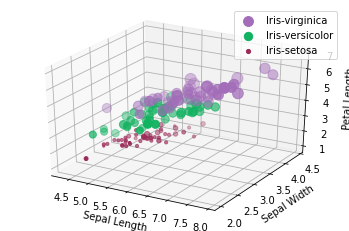

In [10]:
plotAllClasses(dataVisual)

Interactive form of the data above. Plotly has the iris data set already prepared as a pandas dataframe. In this graph, the petal length is instead being represented through the size of the markers.

In [11]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    size='petal_length', color='species')
fig.show()


## Linear Regression

To showcase Linear Regression, I'll be creating a model that predicts the petal length of an iris based off the other features (sepal length, sepal width, petal width) as well as the species of iris (setosa, versicolor, virginica).

This section will also showcase how I deal with the categorical text data of the iris species feature.

### Petal Length Model

In [12]:
# Constructing the data into a tuple containing a tuple of the feature values and the label value (petal length).
dataPL = [((1,x1,x2,x3,species), petal_length) for (x1,x2,petal_length,x3,species) in data]
print(dataPL)

[((1, 5.1, 3.5, 0.2, 'Iris-setosa'), 1.4), ((1, 4.9, 3.0, 0.2, 'Iris-setosa'), 1.4), ((1, 4.7, 3.2, 0.2, 'Iris-setosa'), 1.3), ((1, 4.6, 3.1, 0.2, 'Iris-setosa'), 1.5), ((1, 5.0, 3.6, 0.2, 'Iris-setosa'), 1.4), ((1, 5.4, 3.9, 0.4, 'Iris-setosa'), 1.7), ((1, 4.6, 3.4, 0.3, 'Iris-setosa'), 1.4), ((1, 5.0, 3.4, 0.2, 'Iris-setosa'), 1.5), ((1, 4.4, 2.9, 0.2, 'Iris-setosa'), 1.4), ((1, 4.9, 3.1, 0.1, 'Iris-setosa'), 1.5), ((1, 5.4, 3.7, 0.2, 'Iris-setosa'), 1.5), ((1, 4.8, 3.4, 0.2, 'Iris-setosa'), 1.6), ((1, 4.8, 3.0, 0.1, 'Iris-setosa'), 1.4), ((1, 4.3, 3.0, 0.1, 'Iris-setosa'), 1.1), ((1, 5.8, 4.0, 0.2, 'Iris-setosa'), 1.2), ((1, 5.7, 4.4, 0.4, 'Iris-setosa'), 1.5), ((1, 5.4, 3.9, 0.4, 'Iris-setosa'), 1.3), ((1, 5.1, 3.5, 0.3, 'Iris-setosa'), 1.4), ((1, 5.7, 3.8, 0.3, 'Iris-setosa'), 1.7), ((1, 5.1, 3.8, 0.3, 'Iris-setosa'), 1.5), ((1, 5.4, 3.4, 0.2, 'Iris-setosa'), 1.7), ((1, 5.1, 3.7, 0.4, 'Iris-setosa'), 1.5), ((1, 4.6, 3.6, 0.2, 'Iris-setosa'), 1.0), ((1, 5.1, 3.3, 0.5, 'Iris-setosa'

Next, I need to turn the categorical text data of the iris species into numerical values that my linear regression algorithm can use.

I will be using one-hot encoding to perform this conversion. I decided not to use ordinal encoding (i.e. assign each category a different integer), because there is no ordinal relation for the species.

To perform ordinal encoding, I will be turning the "species" feature into three features (one for each iris species) and assigning a value of one to the feature that represents the data point's actual species.

Ex: ('Iris-Setosa') → (setosa, versicolor, virginica) → (1, 0, 0)

#### One-Hot Encoding

Using list comprehensions to pull out the species data and then turning each of the values into their associated one-hot encoded value.

In [13]:
speciesData = [s for ((_,_,_,_,s),_) in dataPL]
speciesOHE = [(1,0,0) if x == 'Iris-Setosa' else (0,1,0) if x == 'Iris-versicolor' else (0,0,1) for x in speciesData]

Putting the OHE data back into the dataset

In [14]:
dataPL = [((xs[0],xs[1],xs[2],xs[3],setosa,versicolor,virginica), y) for ((xs,y), (setosa, versicolor, virginica)) in zip(dataPL, speciesOHE)]
print(dataPL)

[((1, 5.1, 3.5, 0.2, 0, 0, 1), 1.4), ((1, 4.9, 3.0, 0.2, 0, 0, 1), 1.4), ((1, 4.7, 3.2, 0.2, 0, 0, 1), 1.3), ((1, 4.6, 3.1, 0.2, 0, 0, 1), 1.5), ((1, 5.0, 3.6, 0.2, 0, 0, 1), 1.4), ((1, 5.4, 3.9, 0.4, 0, 0, 1), 1.7), ((1, 4.6, 3.4, 0.3, 0, 0, 1), 1.4), ((1, 5.0, 3.4, 0.2, 0, 0, 1), 1.5), ((1, 4.4, 2.9, 0.2, 0, 0, 1), 1.4), ((1, 4.9, 3.1, 0.1, 0, 0, 1), 1.5), ((1, 5.4, 3.7, 0.2, 0, 0, 1), 1.5), ((1, 4.8, 3.4, 0.2, 0, 0, 1), 1.6), ((1, 4.8, 3.0, 0.1, 0, 0, 1), 1.4), ((1, 4.3, 3.0, 0.1, 0, 0, 1), 1.1), ((1, 5.8, 4.0, 0.2, 0, 0, 1), 1.2), ((1, 5.7, 4.4, 0.4, 0, 0, 1), 1.5), ((1, 5.4, 3.9, 0.4, 0, 0, 1), 1.3), ((1, 5.1, 3.5, 0.3, 0, 0, 1), 1.4), ((1, 5.7, 3.8, 0.3, 0, 0, 1), 1.7), ((1, 5.1, 3.8, 0.3, 0, 0, 1), 1.5), ((1, 5.4, 3.4, 0.2, 0, 0, 1), 1.7), ((1, 5.1, 3.7, 0.4, 0, 0, 1), 1.5), ((1, 4.6, 3.6, 0.2, 0, 0, 1), 1.0), ((1, 5.1, 3.3, 0.5, 0, 0, 1), 1.7), ((1, 4.8, 3.4, 0.2, 0, 0, 1), 1.9), ((1, 5.0, 3.0, 0.2, 0, 0, 1), 1.6), ((1, 5.0, 3.4, 0.4, 0, 0, 1), 1.6), ((1, 5.2, 3.5, 0.2, 0, 0, 1

#### Building Model

In [15]:
# Initial model
alpha=0.01
model=[0, 0, 0, 0, 0, 0, 0]

#### Linear Regression Function

In [16]:
def LinearRegression(alpha, model, data, iterations):
  X = [x for (x,y) in data]
  Y = [y for (x,y) in data]
  for i in range(iterations):
    yPredicted = [F(model, x) for x in X]
    
    # Gradient function
    D = lambda model, X, Y, var: 1/len(Y)*sum([(-2*(r-y)*x[var]) for r,y,x in zip(Y, yPredicted, X)])
    for i in range(len(model)):
      delta = D(model, X, Y, i)
      model[i] = model[i]-alpha*delta

  return model

#### <font color="green">Final Model

In [17]:
model = LinearRegression(alpha, model, dataPL, 1000)
print("Model Learned:", model)

Model Learned: [-0.12655086095870405, 0.710328510592773, -0.6307139131982761, 1.454165670603469, 0.0, -0.010211806878512596, -0.11633905408019149]


##### Plotting The Results and Error

It's difficult to plot this model's predictions against the original data because it has so many weights and therefore can't all be visualized, but I can show a 3D graph for 2 of the features and squared error and the mean squared error (MSE) for this model.

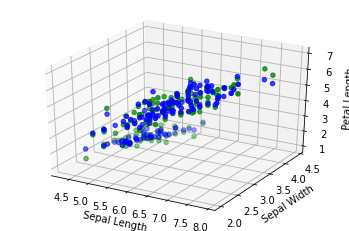

In [18]:
X = [x for (x,y) in dataPL]
Y = [y for (x,y) in dataPL]
dataX1 = [x for (_,x,_,_,_,_,_) in X]
dataX2 = [x for (_,_,x,_,_,_,_) in X]
yPredicted = [F(model, x) for x in X]

ax = plt.axes(projection = '3d')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
ax.set_zlabel("Petal Length")

ax.scatter(dataX1, dataX2, Y, c='g')
ax.scatter(dataX1, dataX2, yPredicted, c='b')

In [19]:
SE = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
MSE = (1/len(dataPL)) * SE
print("Squared Error:", SE)
print("Mean Squared Error:", MSE)

Squared Error: 14.425668182910789
Mean Squared Error: 0.09617112121940527


##### Actual Petal Length Values vs. Final Model Predictions

The model ends up doing pretty well with a mean squared error of ~0.1. I would say that this shows the capabilities and strengths of linear regression through gradient descent as a relatively simple algorithm that can produce sufficiently accurate models for numerical prediction.

This also showed how categorical text data/features without an ordinal relationship could be utilized in linear regression through one-hot encoding.

In [20]:
yComparison = list(zip(Y, yPredicted))
yComparison = pd.DataFrame(yComparison, columns=["Actual Petal Length", "Model Predicted"])
print(yComparison.to_string())

     Actual Petal Length  Model Predicted
0                    1.4         1.463120
1                    1.4         1.636411
2                    1.3         1.368203
3                    1.5         1.360241
4                    1.4         1.329016
5                    1.7         1.714766
6                    1.4         1.316444
7                    1.5         1.455158
8                    1.4         1.344318
9                    1.5         1.427923
10                   1.5         1.550076
11                   1.6         1.313093
12                   1.4         1.419962
13                   1.1         1.064798
14                   1.2         1.644993
15                   1.5         1.612508
16                   1.3         1.714766
17                   1.4         1.608536
18                   1.7         1.845519
19                   1.5         1.419322
20                   1.7         1.739290
21                   1.5         1.627810
22                   1.0         1

## Logistic Regression

In this section, I will be applying Logistic Regression with both Squared Error and Cross Entropy gradient calculations to create a multi-class classification model for the species of an iris based off its features (petal and sepal length/width).

In particular, I will be using the One-Vs-The-Rest methodology to produce 3 models that each attempt to classify one species of iris over the rest. With all three models, a class prediction can be made on a data point for all three models and the prediction with the highest value (closest to 1.0) will indicate the overall predicted class.

### Logistic Regression With Squared Error Gradient

In [21]:
def LogisticRegressionSE(alpha, model, data, iterations):
  X = [x for (x,r) in data]
  R = [r for (x,r) in data]
  dimensions = len(X[0]) # number of dimensions
  N = len(X) # number of data points
  for i in range(iterations):
    deltaW = [0]*dimensions # initially, changes to each weight is 0
    for t in range(N): # for each data point
      yPredicted = sigmoid(F(model, X[t])) # calculate the predicted value using sigmoid(F(W,X)) with current model
      for j in range(dimensions): # for each weight
        deltaW[j] += -2 * (R[t] - yPredicted)*(yPredicted)*(1 - yPredicted)*X[t][j] # calculate the derivative (gradient) and increment change in weight by this amount
    for j in range(dimensions): # for each weight
      model[j] = model[j] - (1/N)*alpha*deltaW[j] # update current model by going in opposite direction of gradient
  return model

### Logistic Regression With Cross Entropy Gradient

In [22]:
def LogisticRegressionCE(alpha, model, data, iterations):
  X = [x for (x,r) in data]
  R = [r for (x,r) in data]
  dimensions = len(X[0]) # number of dimensions
  N = len(X) # number of data points
  for i in range(iterations):
    deltaW = [0]*dimensions # initially, changes to each weight is 0
    for t in range(N): # for each data point
      yPredicted = sigmoid(F(model, X[t])) # calculate the predicted value using sigmoid(F(W,X)) with current model
      for j in range(dimensions): # for each weight
        deltaW[j] += -1 * (R[t] - yPredicted)*X[t][j] # calculate the derivative (gradient) and increment change in weight by this amount
    for j in range(dimensions): # for each weight
      model[j] = model[j] - (1/N)*alpha*deltaW[j] # update current model by going in opposite direction of gradient
  return model

### Setosa vs. Rest Model

#### Data Initialization

The classes need to be given numerical values to use the Logistic Regression algorithms above. For the setosa vs. rest model, the setosa class will be given a value of 1 and versicolor/virginica will be given a value of 0.

When the model is finalized, the prediction value provided by the model on a specific example can be thought of as the likelihood of that example being a setosa iris vs. the rest of the species.

In [23]:
dataSetosa = [((1,x1,x2,x3,x4), species) for (x1,x2,x3,x4,species) in data]
dataSetosa = [(x,1) if species == 'Iris-setosa' else (x,0) for (x,species) in dataSetosa]
print(dataSetosa)

[((1, 5.1, 3.5, 1.4, 0.2), 1), ((1, 4.9, 3.0, 1.4, 0.2), 1), ((1, 4.7, 3.2, 1.3, 0.2), 1), ((1, 4.6, 3.1, 1.5, 0.2), 1), ((1, 5.0, 3.6, 1.4, 0.2), 1), ((1, 5.4, 3.9, 1.7, 0.4), 1), ((1, 4.6, 3.4, 1.4, 0.3), 1), ((1, 5.0, 3.4, 1.5, 0.2), 1), ((1, 4.4, 2.9, 1.4, 0.2), 1), ((1, 4.9, 3.1, 1.5, 0.1), 1), ((1, 5.4, 3.7, 1.5, 0.2), 1), ((1, 4.8, 3.4, 1.6, 0.2), 1), ((1, 4.8, 3.0, 1.4, 0.1), 1), ((1, 4.3, 3.0, 1.1, 0.1), 1), ((1, 5.8, 4.0, 1.2, 0.2), 1), ((1, 5.7, 4.4, 1.5, 0.4), 1), ((1, 5.4, 3.9, 1.3, 0.4), 1), ((1, 5.1, 3.5, 1.4, 0.3), 1), ((1, 5.7, 3.8, 1.7, 0.3), 1), ((1, 5.1, 3.8, 1.5, 0.3), 1), ((1, 5.4, 3.4, 1.7, 0.2), 1), ((1, 5.1, 3.7, 1.5, 0.4), 1), ((1, 4.6, 3.6, 1.0, 0.2), 1), ((1, 5.1, 3.3, 1.7, 0.5), 1), ((1, 4.8, 3.4, 1.9, 0.2), 1), ((1, 5.0, 3.0, 1.6, 0.2), 1), ((1, 5.0, 3.4, 1.6, 0.4), 1), ((1, 5.2, 3.5, 1.5, 0.2), 1), ((1, 5.2, 3.4, 1.4, 0.2), 1), ((1, 4.7, 3.2, 1.6, 0.2), 1), ((1, 4.8, 3.1, 1.6, 0.2), 1), ((1, 5.4, 3.4, 1.5, 0.4), 1), ((1, 5.2, 4.1, 1.5, 0.1), 1), ((1, 5.5,

#### Building Model

In [24]:
alphaSE = 0.02
alphaCE = 0.02
modelSetosaSE = [0.01, 0.01, 0.01, 0.01, 0.01] # Initial model SE
modelSetosaCE = [0.01, 0.01, 0.01, 0.01, 0.01] # Initial model CE

#### Final Model (Squared Error Loss Function)

In [25]:
modelSetosaSE = LogisticRegressionSE(alphaSE, modelSetosaSE, dataSetosa, 1000)
print("Model Learned (SE):", modelSetosaSE) # Model after 1000 iterations

Model Learned (SE): [0.1465186979213436, 0.21573874515453373, 0.7364969628604425, -1.1608261892099507, -0.5195372401007344]


In [26]:
def testModel(data, model): # Tests the model on the original data and prints out some statistics about its performance
  X = [x for (x,r) in data]
  R = [r for (x,r) in data]
  #R = [r if r == 0 else 1 for r in R] # Had to change R values !=0 to 1's to make things easier for iris dataset
  N = len(X)
  predictions = classify(model, X) # Classify according to the final model learned
  truePos = sum([1 for (r,y) in zip(R, predictions) if r == y and r == 1])
  trueNeg = sum([1 for (r,y) in zip(R, predictions) if r == y and r == 0])
  falsePos = sum([1 for (r,y) in zip(R, predictions) if r != y and r == 0])
  falseNeg = sum([1 for (r,y) in zip(R, predictions) if r != y and r == 1])
  
  accuracy = (truePos + trueNeg) / N # How often we got the correct result
  precision = truePos / (truePos + falsePos) # How often we predicted positive and it actually was
  recall = truePos / (truePos + falseNeg) # How many of the actual positive examples were classified positive
  f1 = 2*recall*precision / (recall + precision) # Combination of recall and precision for overall performance

  print("True Pos:", truePos)
  print("True Neg:", trueNeg)
  print("False Pos:", falsePos)
  print("False Neg:", falseNeg)
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1:", f1)

##### Model Results on Original Data

In [27]:
testModel(dataSetosa, modelSetosaSE)

True Pos: 50
True Neg: 100
False Pos: 0
False Neg: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


#### Final Model (Cross Entropy Loss Function)

In [28]:
modelSetosaCE = LogisticRegressionCE(alphaCE, modelSetosaCE, dataSetosa, 1000)
print("Model Learned (CE):", modelSetosaCE) # Model after 1000 iterations

Model Learned (CE): [0.231300226716714, 0.34707696605201777, 1.1770879106082452, -1.8644044236792805, -0.8398524204662405]


##### Model Results on Original Data

In [29]:
testModel(dataSetosa, modelSetosaCE)

True Pos: 50
True Neg: 100
False Pos: 0
False Neg: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


#### Results Discussion
This model very easily distinguishes between setosa and everything else. This makes sense if you look back at the data visualization and see how separated setosa iris' are from the other two classes. Learning rates and iteration count were very low as it was easy find a "line" that classifies setosas.

Setosa irises seem to have larger sepal lengths/widths and smaller petal lengths/widths than the other iris species.

### Versicolor vs. Rest Model

#### Data Initialization

In [30]:
dataVersicolor = [((1,x1,x2,x3,x4), species) for (x1,x2,x3,x4,species) in data]
dataVersicolor = [(x,1) if species == 'Iris-versicolor' else (x,0) for (x,species) in dataVersicolor]
print(dataVersicolor)

[((1, 5.1, 3.5, 1.4, 0.2), 0), ((1, 4.9, 3.0, 1.4, 0.2), 0), ((1, 4.7, 3.2, 1.3, 0.2), 0), ((1, 4.6, 3.1, 1.5, 0.2), 0), ((1, 5.0, 3.6, 1.4, 0.2), 0), ((1, 5.4, 3.9, 1.7, 0.4), 0), ((1, 4.6, 3.4, 1.4, 0.3), 0), ((1, 5.0, 3.4, 1.5, 0.2), 0), ((1, 4.4, 2.9, 1.4, 0.2), 0), ((1, 4.9, 3.1, 1.5, 0.1), 0), ((1, 5.4, 3.7, 1.5, 0.2), 0), ((1, 4.8, 3.4, 1.6, 0.2), 0), ((1, 4.8, 3.0, 1.4, 0.1), 0), ((1, 4.3, 3.0, 1.1, 0.1), 0), ((1, 5.8, 4.0, 1.2, 0.2), 0), ((1, 5.7, 4.4, 1.5, 0.4), 0), ((1, 5.4, 3.9, 1.3, 0.4), 0), ((1, 5.1, 3.5, 1.4, 0.3), 0), ((1, 5.7, 3.8, 1.7, 0.3), 0), ((1, 5.1, 3.8, 1.5, 0.3), 0), ((1, 5.4, 3.4, 1.7, 0.2), 0), ((1, 5.1, 3.7, 1.5, 0.4), 0), ((1, 4.6, 3.6, 1.0, 0.2), 0), ((1, 5.1, 3.3, 1.7, 0.5), 0), ((1, 4.8, 3.4, 1.9, 0.2), 0), ((1, 5.0, 3.0, 1.6, 0.2), 0), ((1, 5.0, 3.4, 1.6, 0.4), 0), ((1, 5.2, 3.5, 1.5, 0.2), 0), ((1, 5.2, 3.4, 1.4, 0.2), 0), ((1, 4.7, 3.2, 1.6, 0.2), 0), ((1, 4.8, 3.1, 1.6, 0.2), 0), ((1, 5.4, 3.4, 1.5, 0.4), 0), ((1, 5.2, 4.1, 1.5, 0.1), 0), ((1, 5.5,

#### Building Model

In [31]:
alphaSE = 0.1
alphaCE = 0.1
modelVersicolorSE = [0.01, 0.01, 0.01, 0.01, 0.01] # Initial model SE
modelVersicolorCE = [0.01, 0.01, 0.01, 0.01, 0.01] # Initial model CE

#### Final Model (Squared Error Loss Function)

In [32]:
modelVersicolorSE = LogisticRegressionSE(alphaSE, modelVersicolorSE, dataVersicolor, 1000)
print("Model Learned (SE):", modelVersicolorSE) # Model after 1000 iterations

Model Learned (SE): [0.3891231816125636, 0.4058877115486959, -1.189324267211758, 0.3303674917680032, -0.886454273134278]


##### Model Results on Original Data

In [33]:
testModel(dataVersicolor, modelVersicolorSE)

True Pos: 12
True Neg: 91
False Pos: 9
False Neg: 38
Accuracy: 0.6866666666666666
Precision: 0.5714285714285714
Recall: 0.24
F1: 0.33802816901408445


#### Final Model (Cross Entropy Loss Function)

In [34]:
modelVersicolorCE = LogisticRegressionCE(alphaCE, modelVersicolorCE, dataVersicolor, 1000)
print("Model Learned (CE):", modelVersicolorCE) # Model after 1000 iterations

Model Learned (CE): [0.8321826200719452, 0.6001803278142375, -1.7862958795819457, 0.5401535485005801, -1.4941864703679544]


##### Model Results on Original Data

In [35]:
testModel(dataVersicolor, modelVersicolorCE)

True Pos: 17
True Neg: 89
False Pos: 11
False Neg: 33
Accuracy: 0.7066666666666667
Precision: 0.6071428571428571
Recall: 0.34
F1: 0.43589743589743596


#### Results Discussion
This model struggled a lot more than the setosa and virginica if you look ahead. I believe this has to do with the fact that you can't really create a line that separates this class from both of the other classes. If you look at the visualization of the data, the three classes form somewhat of a line if you set points in the middles of their data points. Because of this, a line cannot separate the middle class from both of the other classes at the same time easily.

It seems like the best indication of an iris being a virginica versus the other classes was a decent sepal and petal length, and very small sepal and petal widths.

### Virginica vs. Rest Model

#### Data Initialization

In [36]:
dataVirginica = [((1,x1,x2,x3,x4), species) for (x1,x2,x3,x4,species) in data]
dataVirginica = [(x,1) if species == 'Iris-virginica' else (x,0) for (x,species) in dataVirginica]
print(dataVirginica)

[((1, 5.1, 3.5, 1.4, 0.2), 0), ((1, 4.9, 3.0, 1.4, 0.2), 0), ((1, 4.7, 3.2, 1.3, 0.2), 0), ((1, 4.6, 3.1, 1.5, 0.2), 0), ((1, 5.0, 3.6, 1.4, 0.2), 0), ((1, 5.4, 3.9, 1.7, 0.4), 0), ((1, 4.6, 3.4, 1.4, 0.3), 0), ((1, 5.0, 3.4, 1.5, 0.2), 0), ((1, 4.4, 2.9, 1.4, 0.2), 0), ((1, 4.9, 3.1, 1.5, 0.1), 0), ((1, 5.4, 3.7, 1.5, 0.2), 0), ((1, 4.8, 3.4, 1.6, 0.2), 0), ((1, 4.8, 3.0, 1.4, 0.1), 0), ((1, 4.3, 3.0, 1.1, 0.1), 0), ((1, 5.8, 4.0, 1.2, 0.2), 0), ((1, 5.7, 4.4, 1.5, 0.4), 0), ((1, 5.4, 3.9, 1.3, 0.4), 0), ((1, 5.1, 3.5, 1.4, 0.3), 0), ((1, 5.7, 3.8, 1.7, 0.3), 0), ((1, 5.1, 3.8, 1.5, 0.3), 0), ((1, 5.4, 3.4, 1.7, 0.2), 0), ((1, 5.1, 3.7, 1.5, 0.4), 0), ((1, 4.6, 3.6, 1.0, 0.2), 0), ((1, 5.1, 3.3, 1.7, 0.5), 0), ((1, 4.8, 3.4, 1.9, 0.2), 0), ((1, 5.0, 3.0, 1.6, 0.2), 0), ((1, 5.0, 3.4, 1.6, 0.4), 0), ((1, 5.2, 3.5, 1.5, 0.2), 0), ((1, 5.2, 3.4, 1.4, 0.2), 0), ((1, 4.7, 3.2, 1.6, 0.2), 0), ((1, 4.8, 3.1, 1.6, 0.2), 0), ((1, 5.4, 3.4, 1.5, 0.4), 0), ((1, 5.2, 4.1, 1.5, 0.1), 0), ((1, 5.5,

#### Building Model

In [37]:
alphaSE = 0.02
alphaCE = 0.02
modelVirginicaSE = [0.01, 0.01, 0.01, 0.01, 0.01] # Initial model SE
modelVirginicaCE = [0.01, 0.01, 0.01, 0.01, 0.01] # Initial model CE

#### Final Model (Squared Error Loss Function)

In [38]:
modelVirginicaSE = LogisticRegressionSE(alphaSE, modelVirginicaSE, dataVirginica, 1000)
print("Model Learned (SE):", modelVirginicaSE) # Model after 1000 iterations

Model Learned (SE): [-0.26191769171161006, -0.5948725878853423, -0.5898485002408734, 0.9336672594439202, 0.7086444693542031]


##### Model Results on Original Data

In [39]:
testModel(dataVirginica, modelVirginicaSE)

True Pos: 50
True Neg: 95
False Pos: 5
False Neg: 0
Accuracy: 0.9666666666666667
Precision: 0.9090909090909091
Recall: 1.0
F1: 0.9523809523809523


#### Final Model (Cross Entropy Loss Function)

In [40]:
modelVirginicaCE = LogisticRegressionCE(alphaCE, modelVirginicaCE, dataVirginica, 1000)
print("Model Learned (CE):", modelVirginicaCE) # Model after 1000 iterations

Model Learned (CE): [-0.4563797067572469, -0.9968823286625594, -0.9671435169833719, 1.5416028397631534, 1.2045452291084213]


##### Model Results on Original Data

In [41]:
testModel(dataVirginica, modelVirginicaCE)

True Pos: 50
True Neg: 96
False Pos: 4
False Neg: 0
Accuracy: 0.9733333333333334
Precision: 0.9259259259259259
Recall: 1.0
F1: 0.9615384615384615


#### Results Discussion
This model worked out pretty well like the setosas, which follows the previous logic that the non-middle classes can be separated more easily from both of the other classes than the middle class can.

Virginica irises seem to have small sepal lengths/widths and large petal lengths/widths.

## Interesting Results
I was able to create three different models for each class of iris species.

Setosa and viriginica irises were very easy to distinguish where as versicolors were much more difficult.

Based on the weights of the final models, I found some basic relationships and commonalities for each type of iris, which is summarized below.

*   Setosa: Larger Sepals, Smaller Petals   
*   Virginica: Smaller Sepals, Larger Petals
*   Versicolor: Large Length, Small Width for Sepals and Petals



## Multi-class Classification Testing
Now that I've shown the result of each model independently, I'll show how all three models operate in a multi-class classification test where each data point will be run through each model to determine the species with the highest probability.

In [42]:
data = [((1,x1,x2,x3,x4),species) for (x1,x2,x3,x4,species) in data]

In [43]:
yActual = [r for (x,r) in data]
yPredicted = []

for (x,r) in data:
  predictionSetosa = sigmoid(F(modelSetosaSE, x))
  predictionVersicolor = sigmoid(F(modelVersicolorSE, x))
  predictionVirginica = sigmoid(F(modelVirginicaSE, x))
  print(predictionVirginica)

  classPredictions = {'Iris-setosa':predictionSetosa, 'Iris-versicolor':predictionVersicolor, 'Iris-virginica':predictionVirginica}
  chosenClass = max(classPredictions, key=classPredictions.get)
  yPredicted.append(chosenClass)

  print("Data Point:", x)
  print("Setosa Probability:", predictionSetosa)
  print("Versicolor Probability:", predictionVersicolor)
  print("Virginica Probability:", predictionVirginica)
  print("Chosen Class:", chosenClass)
  print("Actual Class:", r)
  print()

0.019620311875663515
Data Point: (1, 5.1, 3.5, 1.4, 0.2)
Setosa Probability: 0.8904612828063289
Versicolor Probability: 0.19493438151164819
Virginica Probability: 0.019620311875663515
Chosen Class: Iris-setosa
Actual Class: Iris-setosa

0.029384136813147874
Data Point: (1, 4.9, 3.0, 1.4, 0.2)
Setosa Probability: 0.8434420970139531
Versicolor Probability: 0.28806997666699297
Virginica Probability: 0.029384136813147874
Chosen Class: Iris-setosa
Actual Class: Iris-setosa

0.026861360315469845
Data Point: (1, 4.7, 3.2, 1.3, 0.2)
Setosa Probability: 0.8703773806003035
Versicolor Probability: 0.22151570210967356
Virginica Probability: 0.026861360315469845
Chosen Class: Iris-setosa
Actual Class: Iris-setosa

0.03610217575874169
Data Point: (1, 4.6, 3.1, 1.5, 0.2)
Setosa Probability: 0.8287665638600495
Versicolor Probability: 0.2474166139515473
Virginica Probability: 0.03610217575874169
Chosen Class: Iris-setosa
Actual Class: Iris-setosa

0.01962997821946152
Data Point: (1, 5.0, 3.6, 1.4, 0.2)

### Sklearn Metrics
Below, I have included some metrics built-in to scikit-learn for looking at the performance of multi-class classifier models.

<function matplotlib.pyplot.show>

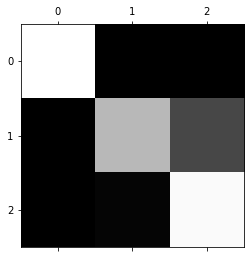

In [44]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(yActual, yPredicted, labels=['Iris-setosa','Iris-versicolor','Iris-virginica'], normalize='true')
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show

For a confusion matrix, the columns refer to the predicted class and the rows refer to the actual class. The "brightness" of each square indicates how many examples fell into each (actual class, predicted class) pairing. Ideally, the model should produce a diagonal line from the top-left to the bottom-right, which this model does pretty well aside from the versicolor class.

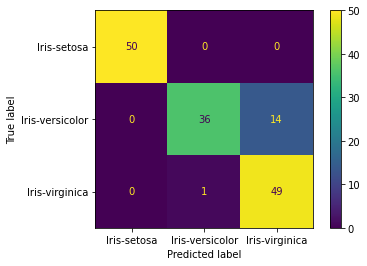

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(yActual, yPredicted)

This is another confusion matrix that is a bit more detailed and shows us the amount of examples for each (true label, predicted label) pairing. You can see that the most confused classification was mistaking a versicolor for a virginica. There is also one example where a virginica was confused for a versicolor.

This coinicides with the visual of the data in that veriscolors and virginicas were very close together and would therefore have a harder time begin distinguished from eachother. This also coincides with the fact that the versicolor class couldn't be easily separated from the other two classes so it got confused for virginicas (the class most similar to it) very often.

In [46]:
from sklearn.metrics import classification_report
print(classification_report(yActual, yPredicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.97      0.72      0.83        50
 Iris-virginica       0.78      0.98      0.87        50

       accuracy                           0.90       150
      macro avg       0.92      0.90      0.90       150
   weighted avg       0.92      0.90      0.90       150



Here's a condensed report of popular metrics used for classification tasks.

The overall accuracy was 90%, which isn't too bad. Setosas were perfectly distinguished since they're very different from the other two classes in terms of the features provided. Versicolors struggled in terms of recall meaning it was difficult for the model to identify a versicolor and often confused it for something else. Virginicas struggled with precision meaning it often predicted a virginica for non-virginica examples.